In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Data Preparation

In [6]:
df = df.drop(columns=["id", "date"])

In [8]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df.shape

(21613, 19)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_df, test_df = train_test_split(df, train_size=0.8)

In [12]:
train_df.shape, test_df.shape

((17290, 19), (4323, 19))

In [13]:
x_train = train_df.drop(columns="price")
y_train = train_df.price

x_test = test_df.drop(columns="price")
y_test = test_df.price

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

In [16]:
gbm = GradientBoostingRegressor()

gbm.fit(x_train, y_train)

GradientBoostingRegressor()

In [20]:
gbm.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [18]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

def plot(dt_regressor):
    dot_data = StringIO()

    export_graphviz(dt_regressor, out_file=dot_data, filled=True, rounded=True, feature_names=x_train.columns)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    return Image(graph.create_png())

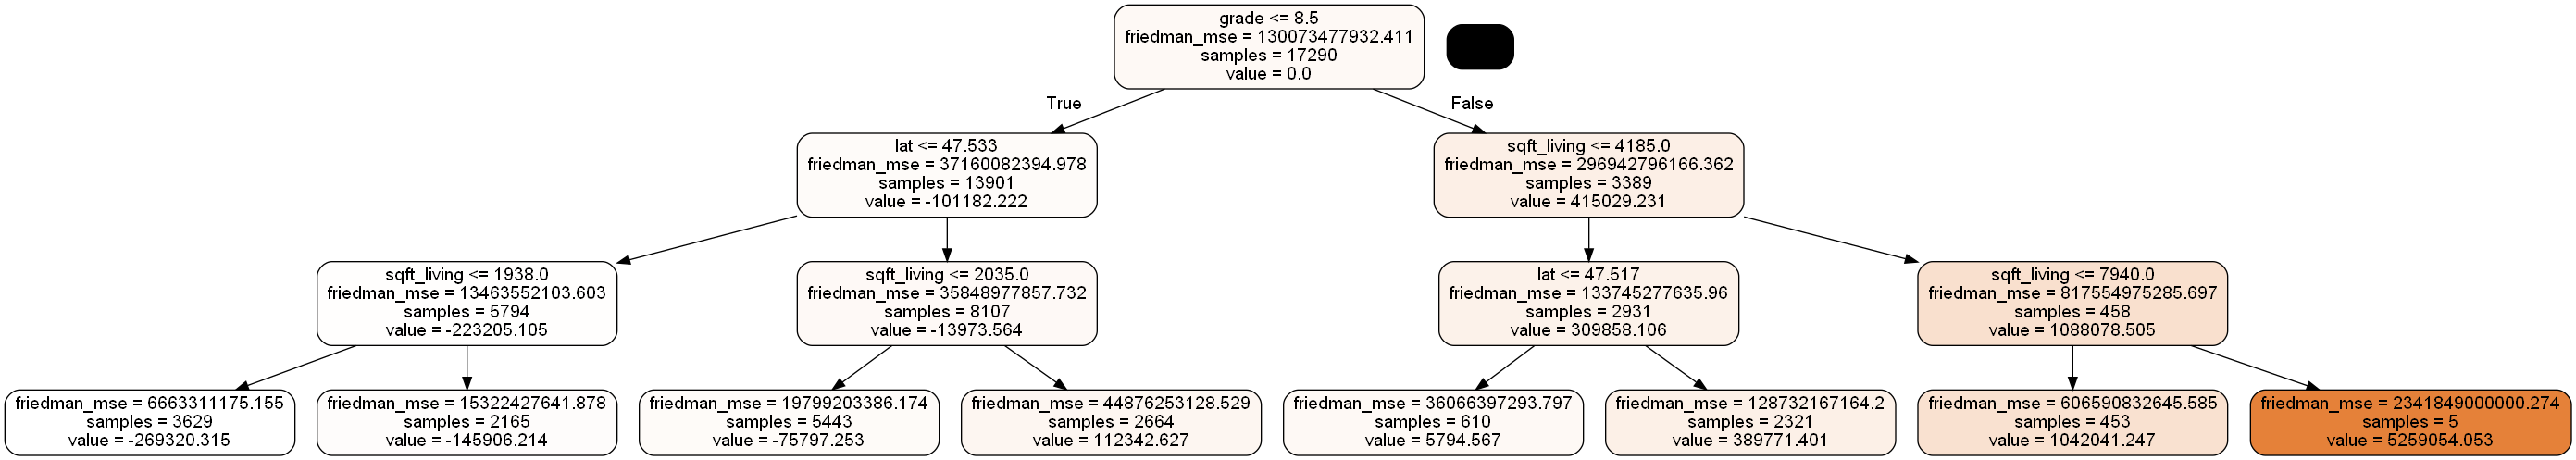

In [19]:
plot(gbm.estimators_[0][0])

#### This is one of the (n_estimators=100) decision trees

#### Let's see feature importances to get the feel of the data

In [21]:
gbm.feature_importances_

array([5.18434768e-05, 5.64624222e-03, 2.84966330e-01, 2.70885679e-03,
       2.60020685e-04, 3.59076037e-02, 2.24692081e-02, 2.50589653e-03,
       3.30111284e-01, 1.50142476e-02, 2.99753211e-03, 3.36571375e-02,
       1.66056072e-03, 1.33543500e-02, 1.62131993e-01, 6.29275902e-02,
       2.23681253e-02, 1.26117739e-03])

In [22]:
pd.DataFrame({"Variable":x_train.columns, "Importance":gbm.feature_importances_}).sort_values(by="Importance", ascending=False).head()

,Variable,Importance
8,grade,0.330111
2,sqft_living,0.284966
14,lat,0.162132
15,long,0.062928
5,waterfront,0.035908
